In [6]:
# Importing all the libraries 
import seaborn as sns
# import matplot
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
import tensorflow as tf
import numpy as np
from configs import paths, dataset_gen
from sklearn.metrics import classification_report

# Data Analysis

In [2]:
img_width, img_height = 150,150
nb_train_sample =1000
nb_validation_samples =100

epochs = 50
batch_size = 20


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



train_generator= train_datagen.flow_from_directory(paths.train_data_dir, target_size =(150,150),batch_size=batch_size, class_mode="binary" )

validation_generator = validation_datagen.flow_from_directory(paths.validation_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")
 
test_generator = test_datagen.flow_from_directory(paths.test_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


label
1    3875
0    1341
Name: count, dtype: int64
proportion of pneumonic cases: 0.7429064417177914
proportion of normal cases: 0.2570935582822086


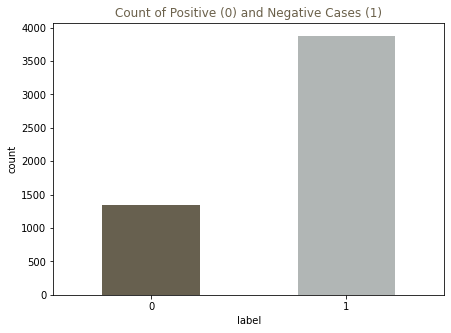

In [3]:
# Get the list of all the images
normal = paths.normal_cases_train.glob('*.jpeg')
pneumonia = paths.pneumonia_cases_train.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_df = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal:
    train_df.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia:
    train_df.append((img,1))

# Get a pandas dataframe from the data we have in our list 
train_df = pd.DataFrame(train_df, columns=['image', 'label'])

# Shuffle the data 
train_df = train_df.sample(frac=1.).reset_index(drop=True)

# finding the proportions of classes
plt.figure(figsize=(7,5))
count = sns.countplot(x=train_df["label"], palette=["#6B614B","#B0B7B5"],width=0.5)
count.set_title("Count of Negative (1) and Positive Cases (1)", color="#6B614B")
proportion = train_df['label'].value_counts()
print(proportion)
print('proportion of pneumonic cases:',proportion[1]/(proportion[1]+proportion[0]))
print('proportion of normal cases:',proportion[0]/(proportion[1]+proportion[0]))


In [4]:
proportion[1]/(proportion[1]+proportion[0])

0.7429064417177914

## Primary Model Analysis

In [5]:
# Load the model
model = tf.keras.models.load_model(paths.model)

In [8]:
x, y = dataset_gen(paths, type='test', return_xy=True)
y_pred_prob = model.predict(x)
y_pred = [0 if x<0.5 else 1 for x in y_pred_prob]

Found 624 images belonging to 2 classes.
20/20 [==============================] - 2s 99ms/step


In [9]:
print(classification_report(y,y_pred ))

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       234
         1.0       0.91      0.96      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.90      0.91       624
weighted avg       0.92      0.92      0.92       624

